In [2]:
import numpy as np
from scipy.stats import lognorm
import matplotlib.pyplot as plt
from dc_qiskit_stochastics.simulation import lognormal

c:\users\cncen\.virtualenvs\dc-qiskit-stochastics-i_-wdnbc\lib\site-packages\qiskit\quantum_info\operators\pauli.py:111: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  z = np.zeros(len(label), dtype=np.bool)
c:\users\cncen\.virtualenvs\dc-qiskit-stochastics-i_-wdnbc\lib\site-packages\qiskit\quantum_info\operators\pauli.py:112: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-no

In [27]:
s0 = 50
sigma = np.sqrt(0.01)
mu = 0.02
t = 12

s = sigma * np.sqrt(t)
mu_tilde = (mu - sigma**2 / 2) * t + np.log(s0)
scale = np.exp(mu_tilde)

lognorm.stats(s=s, scale=scale)

(array(63.56245752), array(515.11099549))

In [28]:
q = np.linspace(0.05, 0.95, 8)
xq = lognorm.ppf(q, s=s, scale=scale)

xq

array([ 33.85981777,  43.51216567,  50.27179987,  56.59714496,
        63.31279677,  71.27899827,  82.35222223, 105.8281991 ])

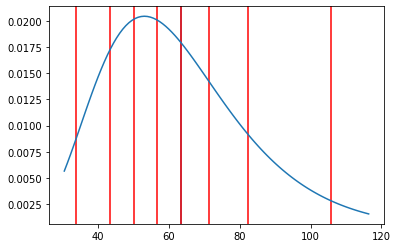

In [29]:
x = np.linspace(xq[0] * 0.9, xq[-1] * 1.1, 100)
y = lognorm.pdf(x, s=s, scale=scale)

plt.axvline(x=s0 * np.exp(mu * t))
for entry in xq:
    plt.axvline(x=entry, color='red')
plt.plot(x, y)

In [30]:
_p = lognorm.pdf(xq, s=s, scale=scale)
p = _p / np.linalg.norm(_p)
p

array([0.20700614, 0.40778951, 0.47499979, 0.47281012, 0.42265868,
       0.33500884, 0.21546237, 0.06623178])